In [48]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('pyspark example1').getOrCreate()

# RDD에서 다룰 수 있는 데이터 타입 TypeSafe
1. 비정형 데이터 - ... json, txt, str
2. 정형 데이터 - 리스트, csv, table

In [49]:
rdd1 = spark.sparkContext.textFile('learning_spark_data/log.txt')
rdd1

learning_spark_data/log.txt MapPartitionsRDD[31] at textFile at NativeMethodAccessorImpl.java:0

In [3]:
rdd1.take(3)

['2025-07-31 10:00:01 INFO User=kim ACTION=LOGIN RESULT=SUCCESS',
 '2025-07-31 10:05:43 WARN User=lee ACTION=DOWNLOAD RESULT=FAIL',
 '2025-07-31 10:08:22 INFO User=park ACTION=UPLOAD RESULT=SUCCESS']

In [4]:
#RDD[dict] - data.json

In [5]:
import json
rdd2 = spark.sparkContext\
.textFile('learning_spark_data/data.json').map(json.loads)
rdd2

PythonRDD[5] at RDD at PythonRDD.scala:53

In [6]:
rdd2.take(3)

[{'user': 'kim',
  'action': 'login',
  'result': 'success',
  'time': '2025-07-31 10:00:01'},
 {'user': 'lee',
  'action': 'download',
  'result': 'fail',
  'time': '2025-07-31 10:05:43'},
 {'user': 'park',
  'action': 'upload',
  'result': 'success',
  'time': '2025-07-31 10:08:22'}]

In [51]:
spark.stop()

# RDD 의 데이터 읽기 패턴
1. RDD 생성 - type 지정x
2. 형식변환 - map()
3. take(n)

# 스파크컨텍스트

1. SparkSession.getOrCreate() -> 세션객체로부터 사전에 설정된 변수에 맞춰 컨텍스트 생성
2. SparkConf + SparkContext -> 저수준 연산에 적합한 방식

In [50]:
from pyspark import SparkConf, SparkContext

In [52]:
conf = SparkConf().setMaster('local').setAppName('country-student-counts2')
conf

In [53]:
spark = SparkContext(conf = conf).getOrCreate()

In [11]:
spark.getConf().getAll()

[('spark.master', 'local'),
 ('spark.app.id', 'local-1754267144285'),
 ('spark.driver.port', '43825'),
 ('spark.executor.id', 'driver'),
 ('spark.driver.extraJavaOptions',
  '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED -Djdk.reflect.useDirectMethodHandle=false'),
 ('spark.app.name

In [12]:
spark.stop()

In [54]:
import os
os.getcwd() # 컨테이너 내부 경로

'/home/jovyan/work'

In [14]:
dir = os.path.join(os.getcwd(), 'learning_spark_data')
dir

'/home/jovyan/work/learning_spark_data'

In [15]:
filename  = 'xAPI-Edu-Data.csv'
filepath = os.path.join(dir, filename)
filepath

'/home/jovyan/work/learning_spark_data/xAPI-Edu-Data.csv'

## 외부저장소에서 데이터를 로드, RDD를 생성

In [99]:
spark = SparkContext(conf = conf).getOrCreate()

In [100]:
lines = spark.textFile('file:///'+filepath.replace('\\', '/'))
lines

file:////home/jovyan/work/learning_spark_data/xAPI-Edu-Data.csv MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [101]:
lines.take(1)

['gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class']

In [102]:
lines.count() # 대용량일 경우 문제 -> take로 일부만

481

# 데이터의 처리

In [103]:
header = lines.first()

In [21]:
datas = lines.filter(lambda row : row != header)
datas.take(3)

['M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M',
 'M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M',
 'M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L']

In [22]:
countries = datas.map(lambda row : row.split(',')[2])
countries

PythonRDD[6] at RDD at PythonRDD.scala:53

In [23]:
countries.take(3)

['KuwaIT', 'KuwaIT', 'KuwaIT']

In [24]:
result = countries.countByValue()
result

defaultdict(int,
            {'KuwaIT': 180,
             'lebanon': 19,
             'Egypt': 9,
             'SaudiArabia': 16,
             'USA': 16,
             'Jordan': 176,
             'venzuela': 1,
             'Iran': 6,
             'Tunis': 9,
             'Morocco': 4,
             'Syria': 6,
             'Iraq': 22,
             'Palestine': 10,
             'Lybia': 6})

In [25]:
result.items()

dict_items([('KuwaIT', 180), ('lebanon', 19), ('Egypt', 9), ('SaudiArabia', 16), ('USA', 16), ('Jordan', 176), ('venzuela', 1), ('Iran', 6), ('Tunis', 9), ('Morocco', 4), ('Syria', 6), ('Iraq', 22), ('Palestine', 10), ('Lybia', 6)])

In [26]:
sorted(result.items(), key = lambda x : x[1], reverse=True)

[('KuwaIT', 180),
 ('Jordan', 176),
 ('Iraq', 22),
 ('lebanon', 19),
 ('SaudiArabia', 16),
 ('USA', 16),
 ('Palestine', 10),
 ('Egypt', 9),
 ('Tunis', 9),
 ('Iran', 6),
 ('Syria', 6),
 ('Lybia', 6),
 ('Morocco', 4),
 ('venzuela', 1)]

In [27]:
sorted(result.items(), key = lambda x : x[1], reverse=True)[:3]

[('KuwaIT', 180), ('Jordan', 176), ('Iraq', 22)]

In [28]:
result.values()

dict_values([180, 19, 9, 16, 16, 176, 1, 6, 9, 4, 6, 22, 10, 6])

In [29]:
total = sum(result.values()) # 총 480명의 학생

In [30]:
# 각 국가별 학생 비율
ratios = {k: round(v / total *100,2) for k,v in result.items()}
ratios

{'KuwaIT': 37.5,
 'lebanon': 3.96,
 'Egypt': 1.88,
 'SaudiArabia': 3.33,
 'USA': 3.33,
 'Jordan': 36.67,
 'venzuela': 0.21,
 'Iran': 1.25,
 'Tunis': 1.88,
 'Morocco': 0.83,
 'Syria': 1.25,
 'Iraq': 4.58,
 'Palestine': 2.08,
 'Lybia': 1.25}

In [31]:
import matplotlib.pyplot as plt

<BarContainer object of 14 artists>

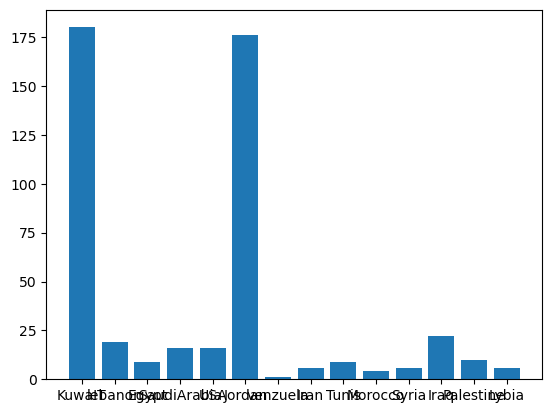

In [32]:
countries = list(result.keys())
counts = list(result.values())
plt.bar(countries, counts)

# RDD 연습문제

In [33]:
# RDD 생성 - 기본 리스트
data = ["KuwaIT", "lebanon", "Jordan", "Jordan", "USA", "Egypt", 
        "Jordan", "USA", "Iran", "Iran", "KuwaIT"]

In [34]:
rdd3 = spark.parallelize(data)

In [35]:
# 소문자로 변환 : lower()
rdd4 = rdd3.map(lambda x: x.lower())

In [36]:
rdd4.take(2)

['kuwait', 'lebanon']

In [37]:
# 요르단만 추출
rdd5 = rdd4.filter(lambda x : x =='jordan')

In [38]:
rdd5.take(3)

['jordan', 'jordan', 'jordan']

In [39]:
# 몇개국인지 세어보세요 : distinct()> count()
rdd3.distinct().count()

6

In [40]:
# 국가별 빈도수
country_pair = rdd4.map(lambda x : (x,1))
country_pair.take(1)

[('kuwait', 1)]

In [41]:
country_counts = country_pair.reduceByKey(lambda a,b: a+b)
country_counts.take(2)

[('kuwait', 2), ('lebanon', 1)]

In [42]:
country_counts.collect()

[('kuwait', 2),
 ('lebanon', 1),
 ('jordan', 3),
 ('usa', 2),
 ('egypt', 1),
 ('iran', 2)]

In [43]:
country_counts.sortByKey().collect()

[('egypt', 1),
 ('iran', 2),
 ('jordan', 3),
 ('kuwait', 2),
 ('lebanon', 1),
 ('usa', 2)]

In [44]:
country_counts.sortBy(lambda x : x[1], ascending = False).collect()

[('jordan', 3),
 ('kuwait', 2),
 ('usa', 2),
 ('iran', 2),
 ('lebanon', 1),
 ('egypt', 1)]

In [45]:
rdd3.reduce(lambda a,b: a+', '+b) 

'KuwaIT, lebanon, Jordan, Jordan, USA, Egypt, Jordan, USA, Iran, Iran, KuwaIT'

# 저장소에 저장하기

In [77]:
output_path = 'output/countries_result'

In [47]:
rdd3.saveAsTextFile(output_path)

Py4JJavaError: An error occurred while calling o359.saveAsTextFile.
: org.apache.hadoop.mapred.FileAlreadyExistsException: Output directory file:/home/jovyan/work/output/countries_result already exists
	at org.apache.hadoop.mapred.FileOutputFormat.checkOutputSpecs(FileOutputFormat.java:131)
	at org.apache.spark.internal.io.HadoopMapRedWriteConfigUtil.assertConf(SparkHadoopWriter.scala:299)
	at org.apache.spark.internal.io.SparkHadoopWriter$.write(SparkHadoopWriter.scala:71)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopDataset$1(PairRDDFunctions.scala:1091)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:407)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopDataset(PairRDDFunctions.scala:1089)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopFile$4(PairRDDFunctions.scala:1062)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:407)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:1027)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopFile$3(PairRDDFunctions.scala:1009)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:407)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:1008)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopFile$2(PairRDDFunctions.scala:965)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:407)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:963)
	at org.apache.spark.rdd.RDD.$anonfun$saveAsTextFile$2(RDD.scala:1620)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:407)
	at org.apache.spark.rdd.RDD.saveAsTextFile(RDD.scala:1620)
	at org.apache.spark.rdd.RDD.$anonfun$saveAsTextFile$1(RDD.scala:1606)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:407)
	at org.apache.spark.rdd.RDD.saveAsTextFile(RDD.scala:1606)
	at org.apache.spark.api.java.JavaRDDLike.saveAsTextFile(JavaRDDLike.scala:564)
	at org.apache.spark.api.java.JavaRDDLike.saveAsTextFile$(JavaRDDLike.scala:563)
	at org.apache.spark.api.java.AbstractJavaRDDLike.saveAsTextFile(JavaRDDLike.scala:45)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:77)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:568)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:833)


In [55]:
import shutil

In [79]:
if os.path.exists(output_path):
    shutil.rmtree(output_path)
rdd3.saveAsTextFile(output_path) # 저장소 경로

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonUtils.getBroadcastThreshold.
: java.lang.NullPointerException: Cannot invoke "org.apache.spark.api.java.JavaSparkContext.sc()" because "jsc" is null
	at org.apache.spark.api.java.JavaSparkContext$.toSparkContext(JavaSparkContext.scala:794)
	at org.apache.spark.api.python.PythonUtils$.getBroadcastThreshold(PythonUtils.scala:87)
	at org.apache.spark.api.python.PythonUtils.getBroadcastThreshold(PythonUtils.scala)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:77)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:568)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:833)


# mmm 데이터 실습하기

In [80]:
import os
os.getcwd()

'/home/jovyan/work'

In [81]:
dir = os.path.join(os.getcwd(), 'learning_spark_data')
dir

'/home/jovyan/work/learning_spark_data'

In [82]:
filename1  = 'mnm_dataset.csv'
filepath1 = os.path.join(dir, filename1)
filepath1

'/home/jovyan/work/learning_spark_data/mnm_dataset.csv'

In [85]:
lines1 = spark.textFile('file:///'+filepath1.replace('\\', '/'))
lines1

file:////home/jovyan/work/learning_spark_data/mnm_dataset.csv MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [86]:
header = lines1.first()

In [87]:
datas = lines1.filter(lambda row : row != header)
datas.take(3)

['TX,Red,20', 'NV,Blue,66', 'CO,Blue,79']

In [88]:
totals = datas \
    .map(lambda x: x.split(',')) \
    .map(lambda x: ((x[0], x[1]), int(x[2]))) \
    .reduceByKey(lambda a, b: a + b)

totals.take(3)


[(('TX', 'Red'), 95404), (('NV', 'Blue'), 90003), (('CO', 'Blue'), 93412)]

In [90]:
color_total = datas.map(lambda x: x.split(','))\
    .map(lambda x : (x[1], int(x[2])))\
    .reduceByKey(lambda a, b: a + b) # 행을 더하는거임(열아님)

In [91]:
color_total.collect()

[('Red', 916864),
 ('Blue', 902516),
 ('Yellow', 923009),
 ('Green', 926150),
 ('Brown', 915703),
 ('Orange', 915793)]

output 으로 내보내기

In [92]:
import shutil

In [94]:
output_path = 'file:///home/jovyan/work/output/mnm_result'
if os.path.exists(output_path):
    shutil.rmtree(output_path)
totals.saveAsTextFile(output_path) # 저장소 경로

In [96]:
!python 02_mnm_result_load.py

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/08/04 01:51:43 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/08/04 01:51:44 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
결과 미리보기----
(('TX', 'Red'), 95404)
(('NV', 'Blue'), 90003)
(('CO', 'Blue'), 93412)
(('OR', 'Blue'), 90526)
(('WA', 'Yellow'), 92920)
총 데이터 라인 수 : 60


In [ ]:
spark.stop()